# Estudio de los datos de Ventas de una Ferretería

Autor: Diana Chacón Ocariz

## Contexto:

Se trata de una pequeña ferretería que maneja un poco más de 3.000 productos distintos. Poseen un software de gestión genérico que les provee una gran cantidad de reportes, básicamente tablas con números, díficiles de analizar (un reporte puede constar de varias decenas de páginas).


## Objetivos del negocio:

**Tener más visibilidad sobre las ventas para poder mejorar el proceso de compras y la toma de decisiones en general:** 

    - Poder analizar objetivamente las ventas
    - Determinar los productos que podrían entrar en rotura de stock al final de un período
    - Identificar los productos menos vendidos
    

## Objetivos académicos:

    - Estudiar un caso real, con datos reales y cuyo resultado pueda ayudar a alguien a resolver un problema. 
    - Demostrar que la ciencia de datos también puede ayudar a las PYMES
    - Conocer y practicar el uso de herramientas de ciencia de datos
    
## Fuentes de datos:

Los datos provienen de reportes sacados del software de gestión de la empresa. Se trata de archivos .xls que contienen sólo los datos de reportes sobre facturas (2021 y 2022), ventas por producto (2021 y 2022) e inventario (2020, 2021 y 2022).
    

In [1]:
# Librerías utilizadas

import os
import glob
from pathlib import Path

import datetime 

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import altair as alt

%matplotlib inline

## Notebook 1: Carga de Datos y primera limpieza:

Una vez leídos los datos y luego de una primera limpieza de los DF, se guardarán en archivos **.parquet** que serán utilizados más tarde en el EDA.

También se guardarán en archivos **.xlsx** que se utilizarán en la creación de reportes en Google Data Studio para failicitar el análisis por parte de los gerentes de la ferretería.

In [2]:
BASE_DIR = Path.cwd()
BASE_DIR

PosixPath('/home/diana/Documentos/Ciencia de Datos/Proyecto Ventas')

In [3]:
# Lectura de los archivos y creación de un DF con todos los datos
    
def read_files(FILES):

    df = pd.DataFrame()

    for filename in glob.glob(f"{BASE_DIR / FILES}"):
        date_file = Path(filename).name[:10]
        df_aux = pd.read_excel(filename)
        df_aux['fecha'] = date_file

        df = pd.concat([df, df_aux])

    return df

## Datos de ventas

In [4]:
FILES_VENTAS = 'datos/in/ven*.xls'
FILES_VENTAS

'datos/in/ven*.xls'

In [5]:
[Path(filename).name for filename in glob.glob(f"{BASE_DIR / FILES_VENTAS}")]

['ventas_2021.xls', 'ventas_2022.xls']

In [6]:
%%time

df = read_files(FILES_VENTAS)

df

CPU times: user 407 ms, sys: 6.08 ms, total: 413 ms
Wall time: 458 ms


,Número,Emisión,Venc.,Cliente,Vendedor,Monto Base,I.V.A.,Otros,Neto,Saldo,Unnamed: 10,fecha
0,0000000001,2021-01-05 08:19:00,2021-01-05 08:19:00,17220570,JESUS ANTONIO CONTRERAS AVENDAÑO,7.00,2.3,0.28,0,2.57,0.00,ventas_202
1,0000000002,2021-01-05 08:30:00,2021-01-05 08:30:00,9330809,GREGORIO MORALES,11.00,36.47,0.00,0,36.47,0.00,ventas_202
2,0000000003,2021-01-05 09:05:00,2021-01-05 09:05:00,9125459,JESUS SILVESTRE ZAMBRANO,7.00,17.74,0.00,0,17.74,0.00,ventas_202
3,0000000004,2021-01-05 09:21:00,2021-01-05 09:21:00,10742177,JORGE SUAREZ,7.00,7.27,0.00,0,7.27,0.00,ventas_202
4,0000000005,2021-01-05 09:14:00,2021-01-05 09:14:00,9338625,GEOVANI ZAMBRANO,14.00,4.25,0.00,0,4.25,0.00,ventas_202
...,...,...,...,...,...,...,...,...,...,...,...,...
86,0000006454,2022-01-21 16:05:00,2022-01-21 16:05:00,15927874,JOSE LEOPOLDO HERNANDEZ,1.00,16,2.56,0,18.56,0.00,ventas_202
87,0000006455,2022-01-22 11:15:00,2022-01-22 11:15:00,13763788,MARIELVY ZAMBRANO RANGEL,1.00,2.44,0.39,0,2.83,2.83,ventas_202
88,0000006456,2022-01-22 11:21:00,2022-01-24 11:21:00,5346238,TEODULO TOBIAS ZAMBRANO ZAMBRANO COMERCIAL LA ...,14.00,254.02,0.00,0,254.02,254.02,ventas_202
89,0000006457,2022-01-24 09:42:00,2022-01-24 09:42:00,23513717,GABRIEL RAMIREZ,7.00,19200,0.00,0,19200.00,19200.00,ventas_202


In [7]:
df.describe()

,Monto Base,Otros,Saldo,Unnamed: 10
count,6415.000000,6415.000000,6415.000000,6413.000000
mean,20.007113,45.789665,65.268164,11.137631
std,633.008894,3369.690085,705.053327,265.138017
min,1.000000,0.000000,0.040000,0.000000
25%,7.000000,0.000000,4.325000,0.000000
50%,10.000000,0.000000,11.150000,0.000000
75%,11.000000,1.330000,32.480000,0.000000
max,38972.920000,269825.850000,38972.920000,19200.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6415 entries, 0 to 90
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Número       6415 non-null   object 
 1   Emisión      6415 non-null   object 
 2   Venc.        6415 non-null   object 
 3   Cliente      6415 non-null   object 
 4   Vendedor     6415 non-null   object 
 5   Monto Base   6415 non-null   float64
 6   I.V.A.       6415 non-null   object 
 7   Otros        6415 non-null   float64
 8   Neto         6415 non-null   object 
 9   Saldo        6415 non-null   float64
 10  Unnamed: 10  6413 non-null   float64
 11  fecha        6415 non-null   object 
dtypes: float64(4), object(8)
memory usage: 651.5+ KB


### Limpieza y transformación de los datos:

- Modificamos el nombre de las columnas para ajustarlos a la información que poseen y facilitar su manejo
- Eliminamos las lineas que continen NaN ya que son los totales de los reportes
- Conservaremos la siguiente información: Fecha, número, cliente, vendedor y neto 
- Cambiamos el tipo a la columna Vendedor para que sea entero y ocupe menos espacio en memoria
- Transformamos el campo de fecha

In [9]:
# Cambio del nombre de las columnas
df.columns

Index(['Número', 'Emisión ', 'Venc.', 'Cliente', 'Vendedor', 'Monto Base',
       'I.V.A.', 'Otros', 'Neto', 'Saldo', 'Unnamed: 10', 'fecha'],
      dtype='object')

In [10]:
cols = ['Num', 
        'Fecha',
        'Vence',
        'Cliente',
        'Nombre',
        'Vendedor',
        'Base',
        'Iva',
        'Otros',
        'Neto',
        'Saldo',
        'Tipo']

In [11]:
df.columns = cols
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6415 entries, 0 to 90
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Num       6415 non-null   object 
 1   Fecha     6415 non-null   object 
 2   Vence     6415 non-null   object 
 3   Cliente   6415 non-null   object 
 4   Nombre    6415 non-null   object 
 5   Vendedor  6415 non-null   float64
 6   Base      6415 non-null   object 
 7   Iva       6415 non-null   float64
 8   Otros     6415 non-null   object 
 9   Neto      6415 non-null   float64
 10  Saldo     6413 non-null   float64
 11  Tipo      6415 non-null   object 
dtypes: float64(4), object(8)
memory usage: 651.5+ KB


In [12]:
# Buscamos las filas con valores NaN 
# Están en la columna saldo. Aunque no conservemos esta columna, debemos eliminar los
# registros correspondientes a los totales
df[ df.isnull().values ]

,Num,Fecha,Vence,Cliente,Nombre,Vendedor,Base,Iva,Otros,Neto,Saldo,Tipo
6323,Totales:,286407.44,15857.83,0.18,302278.56,32452.71,Total de ventas a contado:,269825.85,Total de ventas a credito:,32452.71,NaN,ventas_202
90,Totales:,42945.7,2038.86,0,44991.08,38972.92,Total de ventas a contado:,6018.16,Total de ventas a credito:,38972.92,NaN,ventas_202


In [13]:
# Eliminamos los registros que contienen NaN ya que corresponden a 
# líneas de totales de los reportes 
df.dropna(inplace=True)

In [14]:
# Conservamos solo ciertas columnas
df_ventas = df.loc[:,['Fecha', 'Num', 'Cliente', 'Vendedor', 'Neto']]
df_ventas

,Fecha,Num,Cliente,Vendedor,Neto
0,2021-01-05 08:19:00,0000000001,17220570,7.0,2.57
1,2021-01-05 08:30:00,0000000002,9330809,11.0,36.47
2,2021-01-05 09:05:00,0000000003,9125459,7.0,17.74
3,2021-01-05 09:21:00,0000000004,10742177,7.0,7.27
4,2021-01-05 09:14:00,0000000005,9338625,14.0,4.25
...,...,...,...,...,...
85,2022-01-21 16:10:00,0000006453,310123136,7.0,1158.53
86,2022-01-21 16:05:00,0000006454,15927874,1.0,18.56
87,2022-01-22 11:15:00,0000006455,13763788,1.0,2.83
88,2022-01-22 11:21:00,0000006456,5346238,14.0,254.02


In [15]:
df_ventas.describe()

,Vendedor,Neto
count,6413.000000,6413.000000
mean,8.875721,54.150887
std,3.687876,312.171544
min,1.000000,0.040000
25%,7.000000,4.320000
50%,10.000000,11.140000
75%,11.000000,32.480000
max,14.000000,19200.000000


In [16]:
df_ventas['Vendedor'] = df_ventas['Vendedor'].astype(int)
df_ventas['Fecha'] = pd.to_datetime(df_ventas['Fecha'])

df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6413 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     6413 non-null   datetime64[ns]
 1   Num       6413 non-null   object        
 2   Cliente   6413 non-null   object        
 3   Vendedor  6413 non-null   int64         
 4   Neto      6413 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 300.6+ KB


## Datos de Ventas 2

In [17]:
FILES_VENTAS2 = 'datos/in/ne*.xls'
FILES_VENTAS2

'datos/in/ne*.xls'

In [18]:
[Path(filename).name for filename in glob.glob(f"{BASE_DIR / FILES_VENTAS2}")]

['ne_2021.xls', 'ne_2022.xls']

In [19]:
%%time

df = read_files(FILES_VENTAS2)

df

CPU times: user 272 ms, sys: 1.11 ms, total: 273 ms
Wall time: 343 ms


,Número,Cliente,Vendedor,Nº Control,Venc.,Neto,Unnamed: 6,fecha
0,26/01/2021,NaN,NaN,NaN,NaN,NaT,NaN,ne_2021.xl
1,0000000002,2809020.00,AUDENCIO FORTUNATO PEREZ REY FINCA SANTA BARBARA,11.0,ZC-260121-01,2021-01-26 13:36:00,475.00,ne_2021.xl
2,Total del Día:,475.00,NaN,NaN,NaN,NaT,NaN,ne_2021.xl
3,02/02/2021,NaN,NaN,NaN,NaN,NaT,NaN,ne_2021.xl
4,0000000003,12890112.00,PABLO SANCHEZ,11.0,GDY01274,2021-02-02 09:05:00,475.22,ne_2021.xl
...,...,...,...,...,...,...,...,...
984,0000006969,15926103.00,NELSON SANCHEZ,14.0,24012022,2022-01-24 12:03:00,67.20,ne_2022.xl
985,0000006970,10749874.00,JOSE RAMIREZ,14.0,24012022,2022-01-24 12:05:00,67.07,ne_2022.xl
986,0000006971,32582162.00,JESUS RAMIREZ,7.0,AG240122,2022-01-24 12:14:00,43.20,ne_2022.xl
987,Total del Día:,3163.11,NaN,NaN,NaN,NaT,NaN,ne_2022.xl


In [20]:
# Buscamos las filas con valores NaN 
df[ df.isnull().values ]

,Número,Cliente,Vendedor,Nº Control,Venc.,Neto,Unnamed: 6,fecha
0,26/01/2021,NaN,NaN,NaN,NaN,NaT,NaN,ne_2021.xl
0,26/01/2021,NaN,NaN,NaN,NaN,NaT,NaN,ne_2021.xl
0,26/01/2021,NaN,NaN,NaN,NaN,NaT,NaN,ne_2021.xl
0,26/01/2021,NaN,NaN,NaN,NaN,NaT,NaN,ne_2021.xl
0,26/01/2021,NaN,NaN,NaN,NaN,NaT,NaN,ne_2021.xl
...,...,...,...,...,...,...,...,...
988,Totales:,69053.93,NaN,NaN,NaN,NaT,NaN,ne_2022.xl
988,Totales:,69053.93,NaN,NaN,NaN,NaT,NaN,ne_2022.xl
988,Totales:,69053.93,NaN,NaN,NaN,NaT,NaN,ne_2022.xl
988,Totales:,69053.93,NaN,NaN,NaN,NaT,NaN,ne_2022.xl


In [21]:
# Luego de inspeccionar los datos, podemos eliminar todos los datos NaN
# Corresponden a encabezados y totales de los reportes 
df.dropna(inplace=True)
df

,Número,Cliente,Vendedor,Nº Control,Venc.,Neto,Unnamed: 6,fecha
1,0000000002,2809020.0,AUDENCIO FORTUNATO PEREZ REY FINCA SANTA BARBARA,11.0,ZC-260121-01,2021-01-26 13:36:00,475.00,ne_2021.xl
4,0000000003,12890112.0,PABLO SANCHEZ,11.0,GDY01274,2021-02-02 09:05:00,475.22,ne_2021.xl
7,0000000004,65533479.0,FRANCISCO ALEXIS MOLINA PERNIA (LUBRI -AUTO JA...,7.0,0002,2021-02-19 10:00:00,13.50,ne_2021.xl
10,0000000005,299674044.0,CONSEJO COMUNAL SAN AGUSTIN,7.0,12052021,2021-05-12 14:54:00,5643.00,ne_2021.xl
11,0000006017,19778792.0,JOSE LUIS CONTRERAS,1.0,12052021,2021-05-12 14:20:00,1368.00,ne_2021.xl
...,...,...,...,...,...,...,...,...
982,0000006967,9338923.0,PABLO ENRIQUE PINEDA ZAMBRANO,13.0,1,2022-01-24 11:50:00,19.20,ne_2022.xl
983,0000006968,32582162.0,JESUS RAMIREZ,7.0,AG240122,2022-01-24 11:49:00,772.66,ne_2022.xl
984,0000006969,15926103.0,NELSON SANCHEZ,14.0,24012022,2022-01-24 12:03:00,67.20,ne_2022.xl
985,0000006970,10749874.0,JOSE RAMIREZ,14.0,24012022,2022-01-24 12:05:00,67.07,ne_2022.xl


### Limpieza y transformación de los datos:

- Modificamos el nombre de las columnas para ajustarlos a la información que poseen y facilitar su manejo
- Conservaremos la siguiente información: Fecha, número, cliente, vendedor y neto 
- Cambiamos el tipo a la columna Vendedor para que sea entero y ocupe menos espacio en memoria
- Transformamos el campo de fecha

In [22]:
# Cambio del nombre de las columnas
df.columns

Index(['Número', 'Cliente', 'Vendedor', 'Nº Control', 'Venc.', ' Neto',
       'Unnamed: 6', 'fecha'],
      dtype='object')

In [23]:
cols = ['Num', 
        'Cliente',
        'Nombre',
        'Vendedor',
        'Control',
        'Fecha',
        'Neto',
        'Tipo']

In [24]:
df.columns = cols
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6927 entries, 1 to 986
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Num       6927 non-null   object        
 1   Cliente   6927 non-null   float64       
 2   Nombre    6927 non-null   object        
 3   Vendedor  6927 non-null   float64       
 4   Control   6927 non-null   object        
 5   Fecha     6927 non-null   datetime64[ns]
 6   Neto      6927 non-null   float64       
 7   Tipo      6927 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 487.1+ KB


In [25]:
# Conservamos solo ciertas columnas
df_ventas2 = df.loc[:,['Fecha', 'Num', 'Cliente', 'Vendedor', 'Neto']]
df_ventas2

,Fecha,Num,Cliente,Vendedor,Neto
1,2021-01-26 13:36:00,0000000002,2809020.0,11.0,475.00
4,2021-02-02 09:05:00,0000000003,12890112.0,11.0,475.22
7,2021-02-19 10:00:00,0000000004,65533479.0,7.0,13.50
10,2021-05-12 14:54:00,0000000005,299674044.0,7.0,5643.00
11,2021-05-12 14:20:00,0000006017,19778792.0,1.0,1368.00
...,...,...,...,...,...
982,2022-01-24 11:50:00,0000006967,9338923.0,13.0,19.20
983,2022-01-24 11:49:00,0000006968,32582162.0,7.0,772.66
984,2022-01-24 12:03:00,0000006969,15926103.0,14.0,67.20
985,2022-01-24 12:05:00,0000006970,10749874.0,14.0,67.07


In [26]:
df_ventas2['Vendedor'] = df_ventas2['Vendedor'].astype(int)
df_ventas2['Fecha'] = pd.to_datetime(df_ventas2['Fecha'])

df_ventas2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6927 entries, 1 to 986
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     6927 non-null   datetime64[ns]
 1   Num       6927 non-null   object        
 2   Cliente   6927 non-null   float64       
 3   Vendedor  6927 non-null   int64         
 4   Neto      6927 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 324.7+ KB


In [27]:
df_ventas2.describe()

,Cliente,Vendedor,Neto
count,6.927000e+03,6927.000000,6927.000000
mean,1.104468e+09,9.682113,62.918187
std,9.012751e+10,3.542205,189.963883
min,1.261350e+05,1.000000,0.000000
25%,1.074009e+07,7.000000,8.300000
50%,1.479187e+07,11.000000,21.150000
75%,1.977845e+07,13.000000,53.590000
max,7.501207e+12,14.000000,5643.000000


### Archivo Ventas final

In [28]:
# Unimos los 2 archivos de ventas
df_ventas = pd.concat([df_ventas, df_ventas2], axis=0)
df_ventas

,Fecha,Num,Cliente,Vendedor,Neto
0,2021-01-05 08:19:00,0000000001,17220570,7,2.57
1,2021-01-05 08:30:00,0000000002,9330809,11,36.47
2,2021-01-05 09:05:00,0000000003,9125459,7,17.74
3,2021-01-05 09:21:00,0000000004,10742177,7,7.27
4,2021-01-05 09:14:00,0000000005,9338625,14,4.25
...,...,...,...,...,...
982,2022-01-24 11:50:00,0000006967,9338923.0,13,19.20
983,2022-01-24 11:49:00,0000006968,32582162.0,7,772.66
984,2022-01-24 12:03:00,0000006969,15926103.0,14,67.20
985,2022-01-24 12:05:00,0000006970,10749874.0,14,67.07


In [29]:
df_ventas.describe()

,Vendedor,Neto
count,13340.000000,13340.000000
mean,9.294453,58.703442
std,3.635229,256.126052
min,1.000000,0.000000
25%,7.000000,5.810000
50%,10.000000,15.950000
75%,13.000000,44.370000
max,14.000000,19200.000000


<AxesSubplot:xlabel='Fecha'>

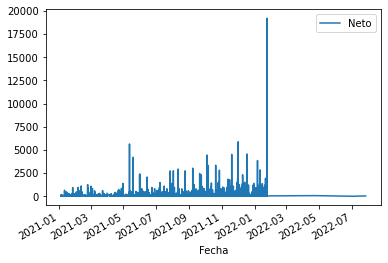

In [30]:
df_ventas.plot(x='Fecha', y='Neto')

In [31]:
max = df_ventas.Neto.max()
df_ventas.query(' Neto == Neto.max() ')

,Fecha,Num,Cliente,Vendedor,Neto
89,2022-01-24 09:42:00,0000006457,23513717,7,19200.0


In [32]:
df_ventas.query(' Fecha > "2022/01/25" ')

,Fecha,Num,Cliente,Vendedor,Neto
3473,2022-04-23 14:24:00,0000003274,2813815.0,14,73.80
5814,2022-07-02 14:29:00,0000005510,2813815.0,7,4.80
302,2022-07-27 08:24:00,0000006309,2813815.0,11,39.65


In [60]:
df_ventas['Dia'] = df_ventas.Fecha.dt.weekday
df_ventas['Mes'] = df_ventas.Fecha.dt.month
df_ventas['Año'] = df_ventas.Fecha.dt.year
df_ventas.sample(20)


,Fecha,Num,Cliente,Vendedor,Neto,Dia,Mes,Year,Año
6185,2021-12-27 11:27:00,0000005864,20287041.0,11,4.05,0,12,2021,2021
4911,2021-11-18 15:12:00,0000004647,28304025.0,7,46.15,3,11,2021,2021
893,2021-07-17 08:10:00,0000000812,10745703.0,11,1.85,5,7,2021,2021
4775,2021-11-16 09:13:00,0000004514,20716798.0,14,207.00,1,11,2021,2021
4143,2021-10-26 15:30:00,0000003913,4094032.0,11,21.40,1,10,2021,2021
5878,2021-08-24 14:12:00,0000005903,310060940,11,16.37,1,8,2021,2021
3808,2021-04-22 11:27:00,0000003818,14019286,7,24.73,3,4,2021,2021
2653,2021-03-15 11:18:00,0000002660,10743692,7,0.25,0,3,2021,2021
5076,2021-11-24 09:49:00,0000004804,19579133.0,11,34.55,2,11,2021,2021
6052,2021-12-20 16:27:00,0000005739,21180369.0,11,28.25,0,12,2021,2021


In [61]:
ventas_dia_semana = df_ventas.pivot_table('Neto',  index='Dia', aggfunc='count' )
ventas_dia_semana

,Neto
Dia,
0,2380
1,2520
2,2501
3,2384
4,2326
5,1225
6,4


<AxesSubplot:xlabel='Dia'>

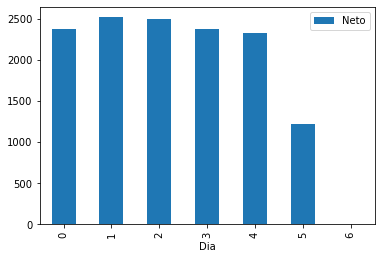

In [62]:
ventas_dia_semana.plot.bar()

In [66]:
ventas_mes_dia = df_ventas.pivot_table('Neto',  index=['Mes', 'Dia', 'Año'], aggfunc='sum' )
ventas_mes_dia = pd.DataFrame(ventas_mes_dia)
ventas_mes_dia.reset_index(inplace=True)
ventas_mes_dia

,Mes,Dia,Año,Neto
0,1,0,2021,4644.40
1,1,0,2022,40289.49
2,1,1,2021,5990.80
3,1,1,2022,22954.07
4,1,2,2021,3180.98
...,...,...,...,...
78,12,1,2021,12646.76
79,12,2,2021,21192.21
80,12,3,2021,14975.75
81,12,4,2021,23216.39


In [67]:
alt.Chart(ventas_mes_dia).mark_rect().encode(
    x='Dia:O',
    y='Mes:O',
    column='Año:O',
    color='Neto:Q'
)

alt.Chart(...)

In [68]:
ventas_mes_dia.query('Mes == 3')

,Mes,Dia,Año,Neto
18,3,0,2021,5918.76
19,3,1,2021,4963.14
20,3,2,2021,4590.17
21,3,3,2021,5115.40
22,3,4,2021,2910.72
23,3,5,2021,878.75


In [ ]:
%%time

from fastparquet import write

# Guardamos el DF limpio para su análisis posterior
df_ventas.to_parquet(f"{BASE_DIR / 'datos/out/ventas.parquet'}", object_encoding='bytes', compression='gzip')
#write(f"{BASE_DIR / 'datos/out/ventas.parquet'}", df_ventas, compression='GZIP', object_encoding='utf8')
df_ventas.to_excel(f"{BASE_DIR / 'datos/out/ventas.xlsx'}")

### Datos del inventario:

In [69]:
FILES_STOCK = 'datos/in/2*.xls'
FILES_STOCK

print(f"{BASE_DIR / FILES_STOCK}")

/home/diana/Documentos/Ciencia de Datos/Proyecto Ventas/datos/in/2*.xls


In [70]:
[Path(filename).name for filename in glob.glob(f"{BASE_DIR / FILES_STOCK}")]

['2021-10-31.xls',
 '2020-05-31.xls',
 '2021-09-30.xls',
 '2022-01-07.xls',
 '2020-01-31.xls',
 '2020-02-29.xls',
 '2020-06-30.xls',
 '2022-01-14.xls',
 '2020-07-31.xls',
 '2021-05-31.xls',
 '2020-10-31.xls',
 '2021-06-30.xls',
 '2021-08-31.xls',
 '2021-12-31.xls',
 '2020-09-30.xls',
 '2021-01-31.xls',
 '2020-03-31.xls',
 '2021-04-30.xls',
 '2021-02-28.xls',
 '2020-08-31.xls',
 '2020-04-30.xls',
 '2021-03-31.xls',
 '2021-07-31.xls',
 '2022-01-21.xls',
 '2020-12-31.xls',
 '2020-11-30.xls',
 '2021-11-30.xls']

In [71]:
%%time

df = read_files(FILES_STOCK)

df

CPU times: user 5.59 s, sys: 52.4 ms, total: 5.64 s
Wall time: 5.85 s


,Costo Stock Inicial,Compras*Costo Unitario,Entradas*Costo Unitario,Ventas*Costo Unitario,Salidas*Costo Unitario,Costo Stock Final,Costo Unitario,Costo Unitario.1,Costo Unitario.2,Costo Unitario.3,...,Inventario Final,Articulo,Unidad,Stock Inic.,Compras,Entradas,Ventas,Salidas,Unnamed: 22,fecha
0,1.00,UNI,32.50000,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.5,PEGA DE CONTACTO/PEGA ZAPATERA (90 ML) ENVASADO,2021-10-31
1,2.00,UNI,12.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,MANTO ASFALTICO 10MTSx3.2MM BITUPLAST,2021-10-31
2,3.00,UNI,13.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,"TACO 1"" BASE REDONDA PVC DURA PARA PATAS DE MU...",2021-10-31
3,4.00,UNI,2.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,MUEBLE ACCESORIOS DE BAÑO HIERRO FORJADO(UNIDAD),2021-10-31
4,5.00,UNI,54.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,"NIPLE PLASTICO 1"" * 13CMS",2021-10-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,6378.00,UNI,1.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"LLAVE 1 1/2"" ESFERICA PESADA GRINACA",2021-11-30
2943,6379.00,UNI,1.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,PROTECTOR ELECTRONICO MONOFASICO 60A VOLTRON,2021-11-30
2944,6380.00,UNI,17.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,FLANCHES 20*20 HIERRO,2021-11-30
2945,6381.00,UNI,4.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAXICAL 10 KILOS,2021-11-30


In [72]:
df.describe()

,Costo Stock Inicial,Entradas*Costo Unitario,Ventas*Costo Unitario,Salidas*Costo Unitario,Costo Stock Final,Costo Unitario,Costo Unitario.1,Costo Unitario.2,Costo Unitario.3,Ret / Auto\nConsumo,...,Salidas/ Auto\nConsumo,Costo Unitario.5,Inventario Final,Articulo,Unidad,Stock Inic.,Compras,Entradas,Ventas,Salidas
count,6.835300e+04,6.835300e+04,6.835300e+04,68353.000000,6.835300e+04,6.835300e+04,68326.000000,6.832600e+04,6.832600e+04,68326.000000,...,68326.000000,68326.000000,68326.00000,68326.000000,68326.0,68326.0,68326.0,6.832600e+04,6.832600e+04,68326.000000
mean,1.665569e+06,2.887621e+04,1.663134e+06,6.886536,5.641997e+04,2.801036e+06,7.372239,3.748206e+03,2.883372e+04,3.359967,...,3.098961,0.439453,0.36404,3.458378,0.0,0.0,0.0,2.247379e+06,2.683369e+05,60.905027
std,1.718897e+08,3.909911e+06,1.369536e+07,905.328526,9.722240e+05,2.285251e+08,129.768725,1.334957e+05,1.192763e+06,27.270515,...,808.840664,13.245039,95.15724,903.993783,0.0,0.0,0.0,1.796796e+07,2.179356e+06,380.561088
min,0.000000e+00,-7.600000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000e+00,-1.477017e+08,-77.000000
25%,7.710000e+02,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,2.000000
50%,1.720000e+03,5.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,7.000000
75%,4.133000e+03,2.300000e+01,3.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,8.474000e+01,3.887500e+00,30.000000
max,2.777511e+10,8.331151e+08,1.082692e+09,236297.127290,9.960000e+07,3.882011e+10,12048.780000,1.620000e+07,2.069329e+08,2012.000000,...,211424.745455,1938.000000,24873.38182,236297.127290,0.0,0.0,0.0,1.252524e+09,1.092000e+08,12838.780000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68353 entries, 0 to 2946
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Costo Stock Inicial      68353 non-null  float64
 1   Compras*Costo Unitario   68353 non-null  object 
 2   Entradas*Costo Unitario  68353 non-null  float64
 3   Ventas*Costo Unitario    68353 non-null  float64
 4   Salidas*Costo Unitario   68353 non-null  float64
 5   Costo Stock Final        68353 non-null  float64
 6   Costo Unitario           68353 non-null  float64
 7   Costo Unitario.1         68326 non-null  float64
 8   Costo Unitario.2         68326 non-null  float64
 9   Costo Unitario.3         68326 non-null  float64
 10  Ret / Auto
Consumo       68326 non-null  float64
 11  Costo Unitario.4         68326 non-null  float64
 12  Salidas/ Auto
Consumo    68326 non-null  float64
 13  Costo Unitario.5         68326 non-null  float64
 14  Inventario Final       

### Limpieza de los datos

- Modificamos el nombre de las columnas para ajustarlos a la información que poseen y facilitar su manejo
- Solo conservaremos: código, nombre, fecha y la información sobre el inventario: Stock inicial, entrdas, ventas y stock final
- Eliminamos las lineas que continen NaN ya que son los totales de los reportes
- Cambiamos el tipo a la columna Código para que sea entero y ocupe menos espacio en memoria
- Transformamos el campo de fecha
- Eliminamos los productos con descripción "0" y null ya que son productos que han sido eliminados del sistema

In [91]:
# Cambio del nombre de las columnas
df.columns

Index(['Codigo', 'Unidad', 'Stock inicial', 'Costo Stock inic', 'Compras',
       'CU compras', 'Compras x CU', 'Entradas', 'CU Entradas',
       'Entradas x CU', 'Ventas', 'CU Ventas', 'Ventas x CU', 'Salida',
       'CU Salida', 'Salida x CU', 'Auto consumo', 'CU auto cons',
       'Salidas/autocons', 'Costo Stock fin', 'CU stock fin', 'Stock final',
       'Producto', 'Fecha'],
      dtype='object')

In [92]:
cols = ['Codigo', 
        'Unidad',
        'Stock inicial',
        'Costo Stock inic',
        'Compras',
        'CU compras',
        'Compras x CU',
        'Entradas',
        'CU Entradas',
        'Entradas x CU',
        'Ventas',
        'CU Ventas',
        'Ventas x CU',
        'Salida',
        'CU Salida',
        'Salida x CU',
        'Auto consumo',
        'CU auto cons',
        'Salidas/autocons',
        'Costo Stock fin',
        'CU stock fin',
        'Stock final',
        'Producto',
        'Fecha']

In [93]:
df.columns = cols
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68353 entries, 0 to 2946
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Codigo            68353 non-null  float64
 1   Unidad            68353 non-null  object 
 2   Stock inicial     68353 non-null  float64
 3   Costo Stock inic  68353 non-null  float64
 4   Compras           68353 non-null  float64
 5   CU compras        68353 non-null  float64
 6   Compras x CU      68353 non-null  float64
 7   Entradas          68326 non-null  float64
 8   CU Entradas       68326 non-null  float64
 9   Entradas x CU     68326 non-null  float64
 10  Ventas            68326 non-null  float64
 11  CU Ventas         68326 non-null  float64
 12  Ventas x CU       68326 non-null  float64
 13  Salida            68326 non-null  float64
 14  CU Salida         68326 non-null  float64
 15  Salida x CU       68326 non-null  float64
 16  Auto consumo      68326 non-null  float64

In [94]:
# Conservamos solo ciertas columnas

df_stock = df.loc[:,['Fecha', 'Codigo', 'Producto', 'Stock inicial', 'Entradas', 'Ventas', 'Stock final']]
df_stock

,Fecha,Codigo,Producto,Stock inicial,Entradas,Ventas,Stock final
0,2021-10-31,1.00,PEGA DE CONTACTO/PEGA ZAPATERA (90 ML) ENVASADO,32.50000,1.0,1.0,32.5
1,2021-10-31,2.00,MANTO ASFALTICO 10MTSx3.2MM BITUPLAST,12.00000,0.0,0.0,12.0
2,2021-10-31,3.00,"TACO 1"" BASE REDONDA PVC DURA PARA PATAS DE MU...",13.00000,0.0,0.0,13.0
3,2021-10-31,4.00,MUEBLE ACCESORIOS DE BAÑO HIERRO FORJADO(UNIDAD),2.00000,0.0,0.0,2.0
4,2021-10-31,5.00,"NIPLE PLASTICO 1"" * 13CMS",54.00000,0.0,40.0,14.0
...,...,...,...,...,...,...,...
2942,2021-11-30,6378.00,"LLAVE 1 1/2"" ESFERICA PESADA GRINACA",1.00000,0.0,0.0,1.0
2943,2021-11-30,6379.00,PROTECTOR ELECTRONICO MONOFASICO 60A VOLTRON,1.00000,0.0,0.0,1.0
2944,2021-11-30,6380.00,FLANCHES 20*20 HIERRO,17.00000,0.0,0.0,17.0
2945,2021-11-30,6381.00,MAXICAL 10 KILOS,4.00000,0.0,3.0,0.0


In [95]:
# Buscamos las filas con valores NaN 
df_stock[ df_stock.isnull().values ].sample(40)

,Fecha,Codigo,Producto,Stock inicial,Entradas,Ventas,Stock final
2580,2021-03-31,5.860000e+01,NaN,0.000000e+00,NaN,NaN,NaN
2281,2020-07-31,7.637482e+09,NaN,2.509849e+08,NaN,NaN,NaN
2219,2020-06-30,4.837949e+09,NaN,1.945519e+08,NaN,NaN,NaN
2048,2020-01-31,0.000000e+00,NaN,8.331151e+08,NaN,NaN,NaN
2447,2020-11-30,2.335874e+10,NaN,0.000000e+00,NaN,NaN,NaN
2465,2020-12-31,2.777511e+10,NaN,0.000000e+00,NaN,NaN,NaN
2862,2022-01-14,1.714077e+05,NaN,0.000000e+00,NaN,NaN,NaN
2757,2021-08-31,5.860000e+01,NaN,0.000000e+00,NaN,NaN,NaN
2096,2020-04-30,2.320103e+09,NaN,1.805557e+08,NaN,NaN,NaN
2066,2020-02-29,1.332896e+09,NaN,1.950495e+07,NaN,NaN,NaN


In [96]:
# Eliminamos los registros que contienen NaN ya que corresponden a 
# líneas de totales de los reportes o productos eliminados
df_stock.dropna(inplace=True)

In [97]:
# Los productos cuya descripción es '0' han sido eliminados del sistema
# Los eliminamos del DF
df_stock.query( "Producto == '0'" )

,Fecha,Codigo,Producto,Stock inicial,Entradas,Ventas,Stock final
84,2021-10-31,101.0,0,2.0,0.0,1.0,1.0
115,2021-10-31,137.0,0,1.0,0.0,0.0,1.0
288,2021-10-31,352.0,0,1.0,0.0,1.0,0.0
1103,2021-10-31,1418.0,0,191.0,0.0,0.0,0.0
1163,2021-10-31,1525.0,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2603,2021-11-30,5331.0,0,5.0,1.0,5.0,1.0
2693,2021-11-30,5423.0,0,1.0,0.0,1.0,0.0
2845,2021-11-30,6178.0,0,1.0,0.0,0.0,0.0
2864,2021-11-30,6276.0,0,1.0,0.0,0.0,0.0


In [98]:
df_stock = df_stock.loc[df_stock.Producto != '0' ]


In [99]:
# Cambiamos el tipo de dato a las columnas Codigo y Fecha
df_stock['Codigo'] = df_stock['Codigo'].astype(int)
df_stock['Fecha'] = pd.to_datetime(df_stock['Fecha'])

df_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67068 entries, 0 to 2945
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          67068 non-null  datetime64[ns]
 1   Codigo         67068 non-null  int64         
 2   Producto       67068 non-null  object        
 3   Stock inicial  67068 non-null  float64       
 4   Entradas       67068 non-null  float64       
 5   Ventas         67068 non-null  float64       
 6   Stock final    67068 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 4.1+ MB


/home/diana/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [100]:
df_stock.describe()

,Codigo,Stock inicial,Entradas,Ventas,Stock final
count,67068.000000,67068.000000,67068.000000,67068.000000,67068.000000
mean,2420.117642,54.675966,7.478374,3.389271,61.810258
std,1868.033815,362.072634,130.967341,27.511819,384.028903
min,1.000000,-76.000000,0.000000,0.000000,-77.000000
25%,761.000000,1.000000,0.000000,0.000000,2.000000
50%,1697.000000,5.000000,0.000000,0.000000,7.000000
75%,4114.000000,24.000000,0.000000,1.000000,30.000000
max,6383.000000,12838.780000,12048.780000,2012.000000,12838.780000


In [101]:
df_stock.sample(20)

,Fecha,Codigo,Producto,Stock inicial,Entradas,Ventas,Stock final
1887,2021-04-30,4111,"ARANDELA PLANA 9/16"" ZINC",121.00,0.00,0.0,121.0
112,2021-01-31,136,"RIEGO ABRAZADERA PLASTICA 75MM * 1"" AGRO",0.00,212.00,13.0,198.0
1433,2021-06-30,2667,"TORNILLO 3/8"" * 1 1/4"" HEX. NC G2 GALVANIZADO ...",84.00,0.00,0.0,84.0
2783,2021-09-30,6326,"BISAGRA GOLPE 2""*1-1/2"" LATON VIEJO CAL 18CT ...",7.00,0.00,1.0,6.0
274,2021-06-30,331,BOLSAS CON TIRAS IZY 100 LTRS (CAJA 6),5.00,0.00,0.0,5.0
1980,2021-06-30,4189,"SOLDADURA 1/8"" PLATA 0% WEST ARCO (POR VARILLA)",48.00,0.00,0.0,48.0
9,2020-03-31,13,ANGEL HIERRO FORJADO,6.00,0.00,0.0,6.0
1419,2021-01-31,2669,"LLAVE 4""/110MM COMPUERTA HF 150 PSI TIPO MARIP...",0.00,1.00,0.0,1.0
791,2021-10-31,980,"SEMI CODO HG 1 1/2""",161.00,0.00,0.0,161.0
2113,2021-06-30,4353,BASE SOPORTE PARA TELEFONO CARRO PARABRISAS,17.00,0.00,0.0,17.0


In [102]:
%%time
# Guardamos el DF limpio para su análisis posterior
df_stock.to_parquet(f"{BASE_DIR / 'datos/out/stock_vol_ventas.parquet'}", compression='gzip')
df_stock.to_excel(f"{BASE_DIR / 'datos/out/stock_vol_ventas.xlsx'}")

CPU times: user 11.9 s, sys: 173 ms, total: 12.1 s
Wall time: 13.3 s


## EDA

In [103]:
df_stock['Mes'] = df_stock.Fecha.dt.month
df_stock['Año'] = df_stock.Fecha.dt.year
df_stock.sample(20)

/home/diana/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Fecha,Codigo,Producto,Stock inicial,Entradas,Ventas,Stock final,Mes,Año
754,2021-05-31,948,BREAKER 1 * 40 AMP. EMPOTRAR CLASSIC LUX,0.0,0.0,0.0,10.0,5,2021
813,2021-10-31,1011,"GRIFERIA DUCHA LLAVE 4"" INDIVIDUAL MANILLA AME...",1.0,0.0,0.0,1.0,10,2021
237,2020-02-29,268,"GRIFERIA GRUPO LAVAPLATOS MEZCLADOR 8""x4"" SAM ...",3.0,0.0,0.0,3.0,2,2020
2628,2021-06-30,5988,"NIVEL 12"" (305MM) ANARANJADO ALUMINIO 2 GOTAS ...",5.0,0.0,0.0,5.0,6,2021
1192,2020-02-29,1520,TANIA INTERRUPTOR EMPOTRAR SENCILLO 1VIA BLANC...,5.0,0.0,0.0,5.0,2,2020
754,2021-09-30,933,PISTOLA DE SILICON 60W * 10W * 120V MARCA VERT,4.0,0.0,1.0,3.0,9,2021
1508,2020-06-30,2845,ANILLO REDUCIDO HG 2 1/2 * 1 1/4,20.0,0.0,0.0,20.0,6,2020
1746,2020-02-29,3839,"MECHA 5/8""*6"" CONCRETO TRUPER BCT-5/8X6 11236",13.0,0.0,0.0,13.0,2,2020
1692,2020-04-30,3643,TANIA INTERRUPTOR DOBLE 1VIA MADERA LINEA MEDI...,8.0,0.0,0.0,8.0,4,2020
1397,2021-06-30,2472,"MECHA 25/64"" HSS TRUPER COBALTO BAV-25/64",17.0,0.0,0.0,17.0,6,2021


In [104]:
ventas_mes_dia = df_stock.pivot_table('Ventas',  index=['Mes', 'Año'], aggfunc='sum' )
ventas_mes_dia = pd.DataFrame(ventas_mes_dia)
ventas_mes_dia.reset_index(inplace=True)
ventas_mes_dia

,Mes,Año,Ventas
0,1,2020,7682.47
1,1,2021,11510.19
2,1,2022,7982.02
3,2,2020,7964.76
4,2,2021,8485.29
5,3,2020,8311.48
6,3,2021,10362.95
7,4,2020,5787.34
8,4,2021,8133.41
9,5,2020,8284.16


In [108]:
alt.Chart(ventas_mes_dia).mark_bar().encode(
    x='Mes:O',
    y='Ventas:O',
    column='Año:O',
    color='Ventas:Q'
)

alt.Chart(...)